<a href="https://colab.research.google.com/github/heart-beatz/pytorch-deep-learning/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. PyTorch Workflow


## Getting set up and what we are covering

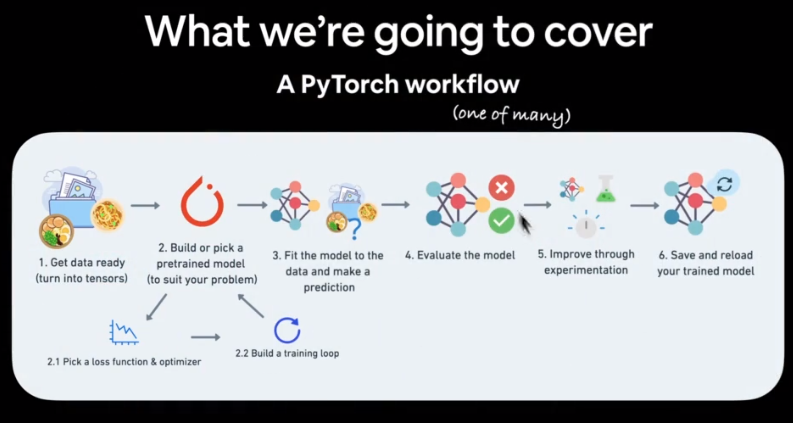

In [ ]:
# PyTorch Workflow

import torch
from torch import nn # nn contains all PyTorch building blocks for Neural Networks\
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

## 1. Loading and preparing Data

* Excel spreadsheet
* Text
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs and podcasts
* DNA ...

Machine learning is a game of two parts:
1. Get the daa into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

Y = f(X, b) + e

We will use a linear regression formula to make a straight line with known *parameters*.

In [ ]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim= 1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(Y)

(50, 50)

### Splitting data into training and test set


In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[train_split:], Y[train_split:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

In [ ]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize= (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions
  if predictions != None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


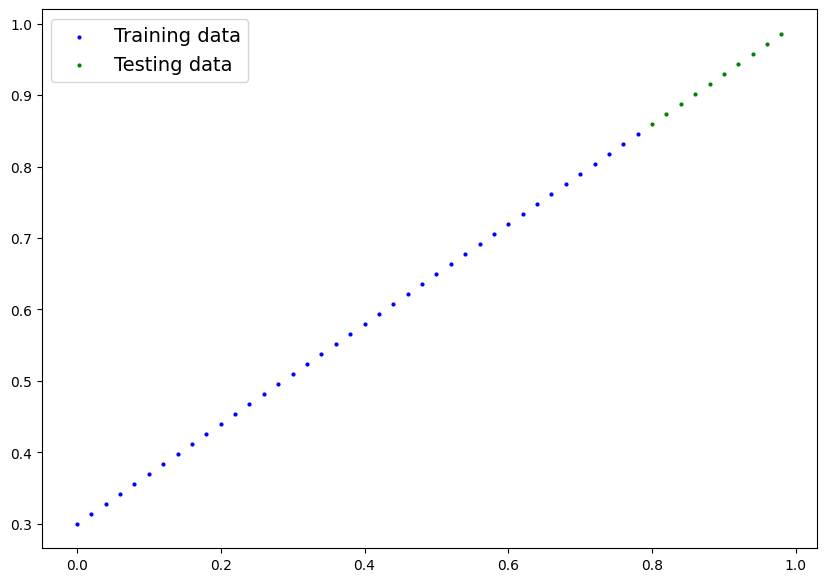

In [ ]:
plot_prediction()

## 2. Build model

Our first PyTorch model!

This is very exciting... let's do it!

What our model does:
* start with random values (weight & bias)
* look at training data and adjust the random values to better represent or get closer to the ideal values.

Hiow does it do so?

1. Forward propagation (Gradient Descent)
2. Backward propagation

In [ ]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <-- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # start with a random weight and try to adjust it to the ideal value
                                            requires_grad=True, # can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # PyTorch loves datatype float32
    self.bias = nn.Parameter(torch.randn(1, # start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # can this parameter be updated via gradient descent?
                                         dtype= torch.float)) # PyTorch loves datatype float32

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + bias # this is the linear regression formula


### PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computational graph (a neural network can be considered a computational graph)

* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.

* `torch.nn.Module` - the base class for all neural network modules, if you subclass it, you should overwrite `forward()` method.

* `torch.optim` - this is where the optimizers in PyTorch live, they will help with gradient descent.

* `def forward()` - all `nn.Module` subclasses require to overwrite the `forward()` method. This method defines what happens in the forward computation.

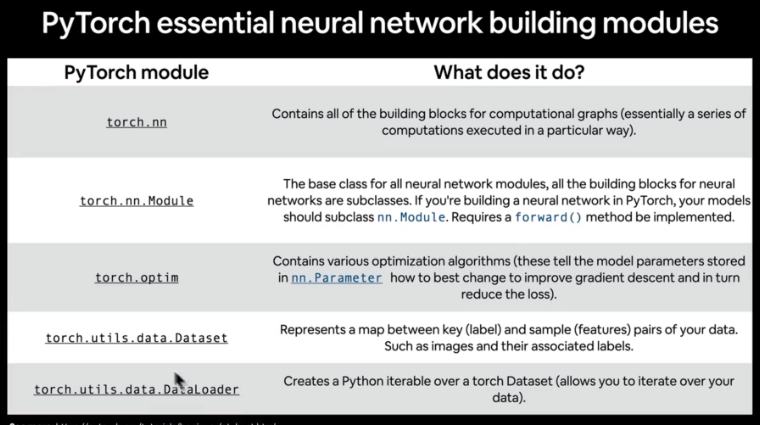

### Checking the contents of our PyTorch model

Now we have created a model, let's see what's inside ...

So we can check our models parameters or whats inside our model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.5694],
        [0.5761],
        [0.5828],
        [0.5896],
        [0.5963],
        [0.6030],
        [0.6098],
        [0.6165],
        [0.6232],
        [0.6300]], grad_fn=<AddBackward0>)

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
 # Make predictions with model
 # With infernce mode the pred are calculated faster, but there is less side data collected
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.5694],
        [0.5761],
        [0.5828],
        [0.5896],
        [0.5963],
        [0.6030],
        [0.6098],
        [0.6165],
        [0.6232],
        [0.6300]])

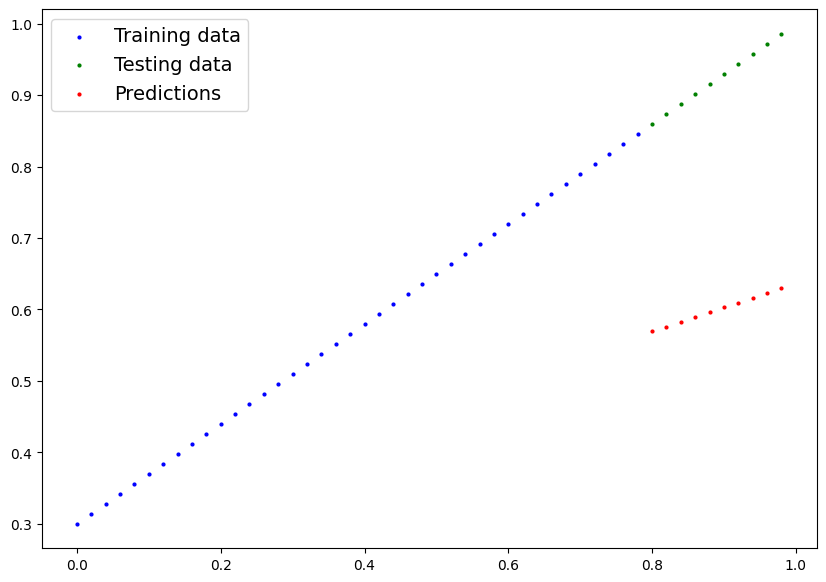

In [ ]:
plot_prediction(predictions=y_preds)

## 3. Train model

The whole idea of trainingin is for a model to move from some unknown parameters to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are, is using a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we are going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong a model's prediction are compared to the ideal outputs. Lower cost is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (eg. weights and bias)

And specifically for PyTorch, we need:
* a training loop
* a testing loop



In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check ur model's predictive power, let;s see how well it predicts `y_test()` based on `x_test()`. When we pass data through our model, it is running it through the `forward()` method.

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Make pr3edictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.5694],
        [0.5761],
        [0.5828],
        [0.5896],
        [0.5963],
        [0.6030],
        [0.6098],
        [0.6165],
        [0.6232],
        [0.6300]])

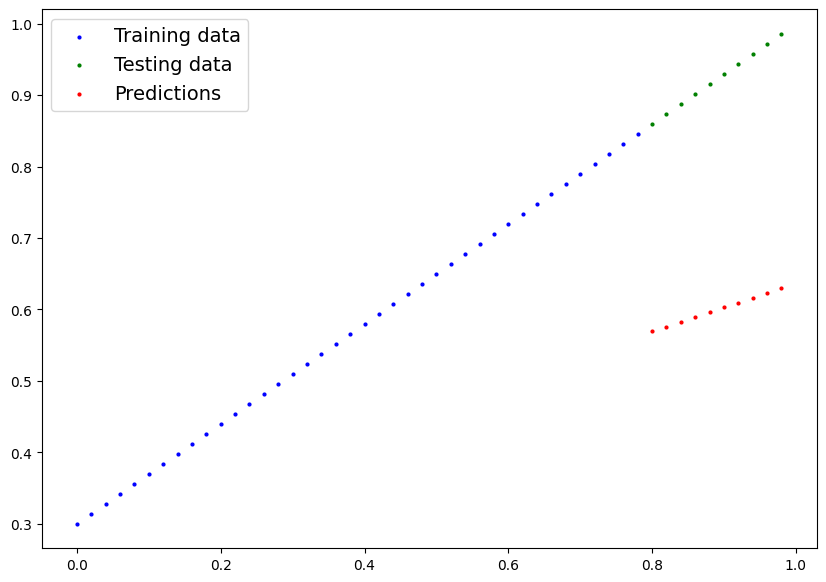

In [ ]:
plot_prediction(X_train, y_train, X_test, y_test, y_preds)

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) #lr = learning rate

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moviing through our model's `forward()` functions) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (back propagation).
5. Optimizer step - use the optimizer to adjust our models's parameters to try minimize the loss.

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(24)
# An epoch is one loop through the data...
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to update

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform back propagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different setting, which are not needed for evaluation (dropout, batch normalization)
  with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
    # 1. Do the forward pass in inference mode
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.14169074594974518 | Test loss: 0.3198745846748352
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1288]))])
Epoch: 10 | Loss: 0.12648078799247742 | Test loss: 0.28516465425491333
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.1288]))])
Epoch: 20 | Loss: 0.11127082258462906 | Test loss: 0.25045472383499146
OrderedDict([('weights', tensor([0.4186])), ('bias', tensor([0.1288]))])
Epoch: 30 | Loss: 0.0960608422756195 | Test loss: 0.21574480831623077
OrderedDict([('weights', tensor([0.4576])), ('bias', tensor([0.1288]))])
Epoch: 40 | Loss: 0.08085088431835175 | Test loss: 0.1810348629951477
OrderedDict([('weights', tensor([0.4966])), ('bias', tensor([0.1288]))])
Epoch: 50 | Loss: 0.06564091145992279 | Test loss: 0.14632496237754822
OrderedDict([('weights', tensor([0.5356])), ('bias', tensor([0.1288]))])
Epoch: 60 | Loss: 0.050430942326784134 | Test loss: 0.11161501705646515
OrderedDict([('weights', tensor([0.5746])), ('bias', tensor([0.1288]

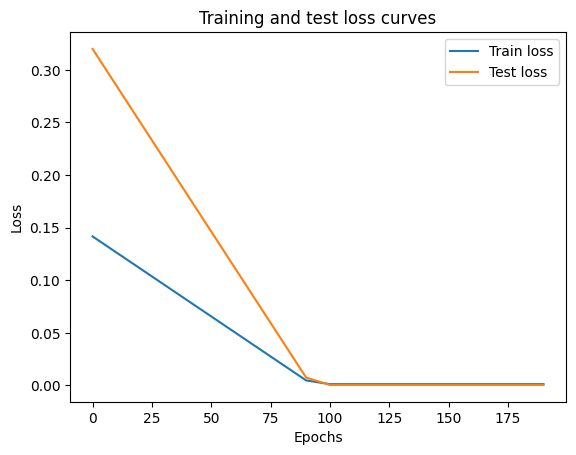

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

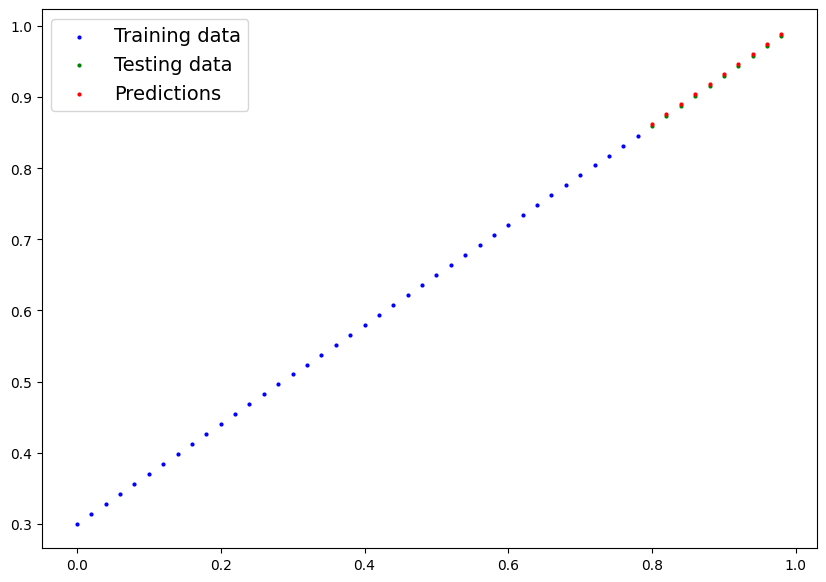

In [ ]:
plot_prediction(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in Pythons `pickle` format.

2. `torch.load()` - allows you to load a saved PyTorch object.

3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7033])), ('bias', tensor([0.1288]))])

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state dict (recommended - not saving the full model)
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_0.state_dict(),
           f= MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Dec 18 12:49 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we have saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7033])), ('bias', tensor([0.1288]))])

In [ ]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class.

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7033])), ('bias', tensor([0.1288]))])

In [ ]:
type(loaded_model_0)

__main__.LinearRegressionModel

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8626],
        [0.8767],
        [0.8908],
        [0.9048],
        [0.9189],
        [0.9330],
        [0.9470],
        [0.9611],
        [0.9752],
        [0.9892]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8626],
        [0.8767],
        [0.8908],
        [0.9048],
        [0.9189],
        [0.9330],
        [0.9470],
        [0.9611],
        [0.9752],
        [0.9892]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting all together
Let's go back through the steps above and see it all in one place.

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [ ]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1. Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # withut unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize= (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions
  if predictions != None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

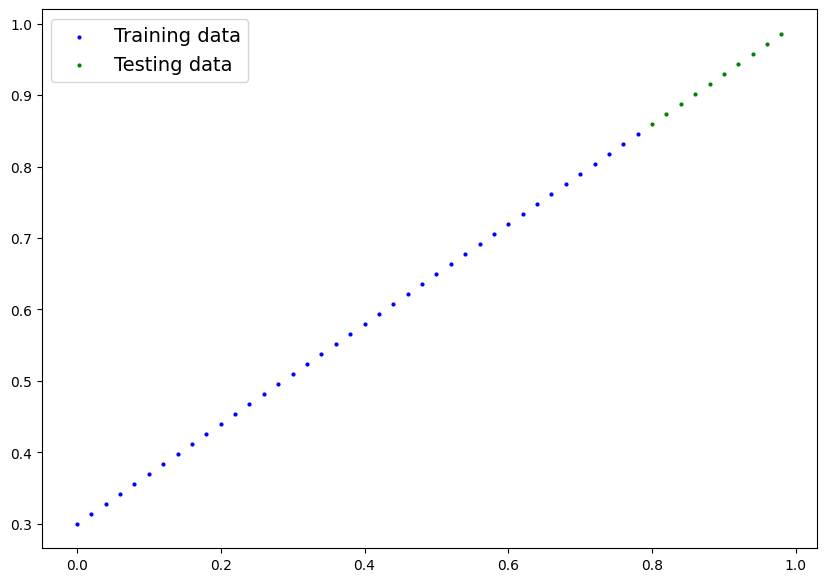

In [ ]:
# Plot the data
# Note: if you dont have the plot_predictions() function loaded, this will error

plot_prediction(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model (`nn.Linear`)

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating the model parameters / also called: linear transform probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# setup loss function
loss_fn = nn.L1Loss() # same as MAE

# setup our optimizer
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.01)

# Let's write a training loop
torch.manual_seed(42)
epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening

  if epoch % 10 == 0:
    print(f"Eppoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Eppoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Eppoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Eppoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Eppoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Eppoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Eppoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Eppoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Eppoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Eppoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Eppoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Eppoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Eppoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Eppoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Eppoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.0

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

## 6.4 Making and evaluating predictions


In [ ]:
# Turn the model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

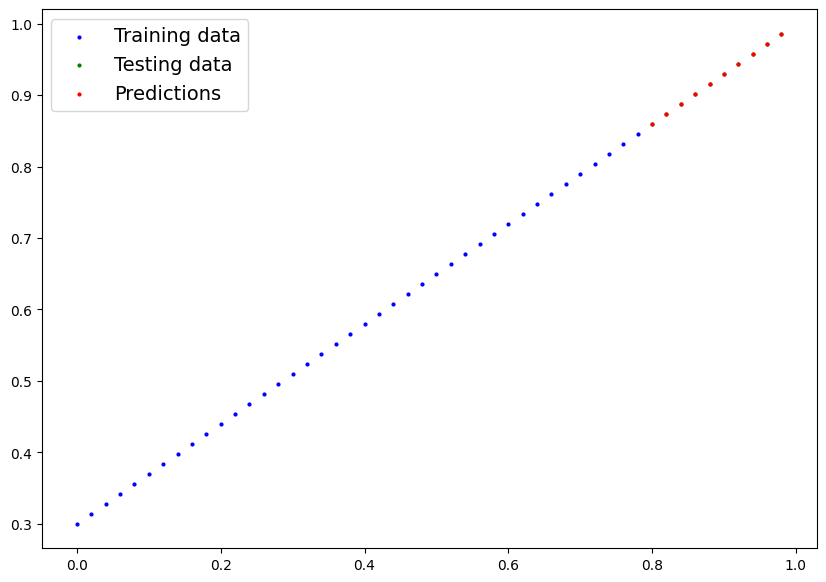

In [ ]:
plot_prediction(predictions = y_preds.cpu())

### 6.5 Saving and loading trained model

In [ ]:
from pathlib import Path
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model and save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# :Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved state_dict()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1 = loaded_model_1.to(device)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Evaluate loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises & Extra-curriculum

https://www.learnpytorch.io/01_pytorch_workflow/#extra-curriculum